<a href="https://colab.research.google.com/github/keshav-hl/Data-Science-Projects/blob/main/Netflix_movie_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Netflix is known for its work in data science, AI, and ML, particularly for building strong recommendation models and algorithms that understand customer behavior and patterns. Suppose you are working in a data-driven job role, and you have a dataset of more than 9,000 movies. You need to solve the following questions to help the company make informed business decisions accordingly.


---


1. What is the most frequent genre of movies released on Netflix?

2. What genres has highest votes?

3. What movie got the highest popularity? What's its genre?

4. What movie got the lowest popularity? What's its genre?

5. Which year has the most filmed movies?

Importing Lib in python

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing DataSet

In [ ]:
df = pd.read_csv("/content/TMDB 10000 Movies Dataset.csv")

In [ ]:
df.head()

,id,original_language,original_title,overview,popularity,release_date,title,vote_average,vote_count
0,851644,ko,20세기 소녀,Yeon-du asks her best friend Bora to collect a...,170.540,2022-10-06,20th Century Girl,8.7,290
1,238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",86.518,1972-03-14,The Godfather,8.7,16988
2,278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,84.681,1994-09-23,The Shawshank Redemption,8.7,22748
3,240,en,The Godfather Part II,In the continuing saga of the Corleone crime f...,44.957,1974-12-20,The Godfather Part II,8.6,10293
4,667257,es,Cosas imposibles,"Matilde is a woman who, after the death of her...",32.859,2021-06-17,Impossible Things,8.6,299


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13957 entries, 0 to 13956
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 13957 non-null  object 
 1   original_language  13957 non-null  object 
 2   original_title     13957 non-null  object 
 3   overview           13946 non-null  object 
 4   popularity         13957 non-null  float64
 5   release_date       13957 non-null  object 
 6   title              13957 non-null  object 
 7   vote_average       13957 non-null  float64
 8   vote_count         13957 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 981.5+ KB


In [ ]:
df['overview'].head()

,overview
0,Yeon-du asks her best friend Bora to collect a...
1,"Spanning the years 1945 to 1955, a chronicle o..."
2,Framed in the 1940s for the double murder of h...
3,In the continuing saga of the Corleone crime f...
4,"Matilde is a woman who, after the death of her..."


In [ ]:
df.duplicated().sum()

np.int64(3956)

In [ ]:
df.describe()

,popularity,vote_average,vote_count
count,13957.000000,13957.000000,13957.000000
mean,21.413807,6.481558,1432.765996
std,95.712571,0.696883,2435.677041
min,0.600000,5.300000,200.000000
25%,10.113000,6.000000,312.000000
50%,13.725000,6.300000,570.000000
75%,20.466000,7.000000,1393.000000
max,9137.939000,8.700000,32679.000000


In [ ]:
'''Exploration Summary

• we have a dataframe consisting of 9827 rows and 9 columns.
• our dataset looks a bit tidy with no NaNs nor duplicated values.
• Release_Date column needs to be casted into datetime and to extract only the year value.
• Overview, Original_Language and Poster-Url wouldn't be so useful during analysis, so we'll drop them.
• there is noticeable outliers in Popularity column
• Vote_Average better be categorised for proper analysis.
• Genre column has comma separated values and white spaces that needs to be handled and casted into category.'''

"Exploration Summary\n\n• we have a dataframe consisting of 9827 rows and 9 columns.\n• our dataset looks a bit tidy with no NaNs nor duplicated values.\n• Release_Date column needs to be casted into datetime and to extract only the year value.\n• Overview, Original_Language and Poster-Url wouldn't be so useful during analysis, so we'll drop them.\n• there is noticeable outliers in Popularity column\n• Vote_Average better be categorised for proper analysis.\n• Genre column has comma separated values and white spaces that needs to be handled and casted into category."

Editing the release_date of the dataset

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].dtypes

dtype('<M8[ns]')

In [ ]:
df['release_date'] = df['release_date'].dt.year
print(df['release_date'])

0        2022
1        1972
2        1994
3        1974
4        2021
         ... 
13952    2003
13953    2014
13954    2011
13955    2011
13956    1988
Name: release_date, Length: 13957, dtype: int32


In [ ]:
df.head()

,id,original_language,original_title,overview,popularity,release_date,title,vote_average,vote_count
0,851644,ko,20세기 소녀,Yeon-du asks her best friend Bora to collect a...,170.540,2022,20th Century Girl,8.7,290
1,238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",86.518,1972,The Godfather,8.7,16988
2,278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,84.681,1994,The Shawshank Redemption,8.7,22748
3,240,en,The Godfather Part II,In the continuing saga of the Corleone crime f...,44.957,1974,The Godfather Part II,8.6,10293
4,667257,es,Cosas imposibles,"Matilde is a woman who, after the death of her...",32.859,2021,Impossible Things,8.6,299


Drop the in wanted columns in the dataset

In [ ]:
cols = ['original_language', 'original_title', 'overview']
df.drop(cols, axis=1, inplace=True)

In [ ]:
df.head()

,id,popularity,release_date,title,vote_average,vote_count
0,851644,170.540,2022,20th Century Girl,8.7,290
1,238,86.518,1972,The Godfather,8.7,16988
2,278,84.681,1994,The Shawshank Redemption,8.7,22748
3,240,44.957,1974,The Godfather Part II,8.6,10293
4,667257,32.859,2021,Impossible Things,8.6,299


categorizing Vote_Average column

We would cut the Vote_Average values and make 4 categories: popular, average, below_avg, not_popular to describe it more using catigorize_col() provided above.

In [ ]:
def categorise_col(df, col, labels):
  edges = [
            df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']
          ]
  df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
  return df

In [ ]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
df = categorise_col(df, 'vote_average', labels)
print(df['vote_average'].unique())

['popular', 'average', 'below_avg', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']


In [ ]:
df.head()

,id,popularity,release_date,title,vote_average,vote_count
0,851644,170.540,2022,20th Century Girl,popular,290
1,238,86.518,1972,The Godfather,popular,16988
2,278,84.681,1994,The Shawshank Redemption,popular,22748
3,240,44.957,1974,The Godfather Part II,popular,10293
4,667257,32.859,2021,Impossible Things,popular,299


In [ ]:
df['vote_average'].value_counts()

,count
vote_average,
not_popular,3900
average,3797
popular,3174
below_avg,2830


In [ ]:
df.dropna(inplace=True)

df.isna().sum()

,0
id,0
popularity,0
release_date,0
title,0
vote_average,0
vote_count,0


we'd split title into a list and then explode our dataframe to have only one title per row for ezch movie

In [ ]:
df['title'] = df['title'].str.split(" ")
df = df.explode("title")
df.head()

,id,popularity,release_date,title,vote_average,vote_count
0,851644,170.540,2022,20th,popular,290
0,851644,170.540,2022,Century,popular,290
0,851644,170.540,2022,Girl,popular,290
1,238,86.518,1972,The,popular,16988
1,238,86.518,1972,Godfather,popular,16988


In [ ]:
df['title'] = df['title'].astype('category')
df['title'].dtype

CategoricalDtype(categories=['!', '#1', '#Alive', '#Cheersmack', '#realityhigh', '&',
                  ''47', ''66', ''71', ''73',
                  ...
                  'y', '¡Three', '¿Y', 'Æon', 'Époque', 'è', 'él?', 'ʻOhana',
                  '–', '♥'],
, ordered=False, categories_dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38381 entries, 0 to 13828
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   id            38381 non-null  object  
 1   popularity    38381 non-null  float64 
 2   release_date  38381 non-null  int32   
 3   title         38381 non-null  category
 4   vote_average  38381 non-null  category
 5   vote_count    38381 non-null  int64   
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 1.7+ MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38381 entries, 0 to 13828
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   id            38381 non-null  object  
 1   popularity    38381 non-null  float64 
 2   release_date  38381 non-null  int32   
 3   title         38381 non-null  category
 4   vote_average  38381 non-null  category
 5   vote_count    38381 non-null  int64   
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 1.7+ MB


In [ ]:
df.nunique()

,0
id,9873
popularity,8172
release_date,110
title,8301
vote_average,4
vote_count,3218


Data Visulization

In [ ]:
sns.set_style('whitegrid')

1) which is the highest vote average column

In [ ]:
df['vote_average'].describe()

,vote_average
count,38381
unique,4
top,average
freq,10632


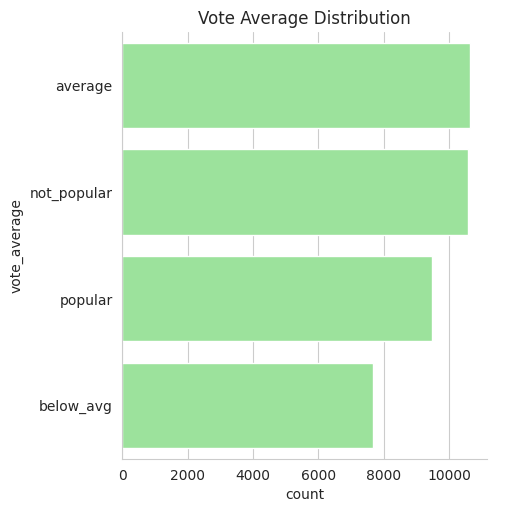

In [ ]:
sns.catplot(y= 'vote_average', data=df, kind= 'count',
            order= df['vote_average'].value_counts().index,
            color= 'lightgreen')
plt.title('Vote Average Distribution')
plt.show()

2. What movie got the highest popularity.

In [ ]:
df['popularity'].describe()

,popularity
count,38381.000000
mean,21.932557
std,88.320587
min,0.600000
25%,10.166000
50%,13.957000
75%,21.281000
max,9137.939000


In [ ]:
df['popularity'].head(2)

,popularity
0,170.54
0,170.54


In [ ]:
df[df['popularity'] == df['popularity'].max()]

,id,popularity,release_date,title,vote_average,vote_count
2098,436270,9137.939,2022,Black,popular,2296
2098,436270,9137.939,2022,Adam,popular,2296


3. What movie got the lowest popularity.

In [ ]:
df[df['popularity'] == df['popularity'].min()]

,id,popularity,release_date,title,vote_average,vote_count
28,12477,0.6,1988,Grave,popular,4389
28,12477,0.6,1988,of,popular,4389
28,12477,0.6,1988,the,popular,4389
28,12477,0.6,1988,Fireflies,popular,4389
37,92321,0.6,2011,Hotarubi,popular,862
37,92321,0.6,2011,no,popular,862
37,92321,0.6,2011,Mori,popular,862
37,92321,0.6,2011,e,popular,862
3864,11367,0.6,1978,Odds,average,332
3864,11367,0.6,1978,and,average,332


4. Which year has the most filmmed movies?

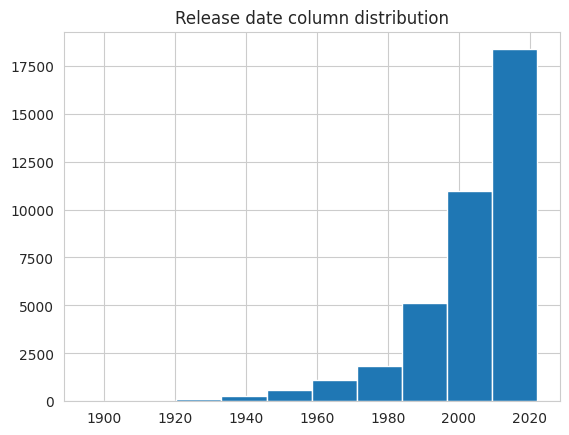

In [ ]:
df['release_date'].hist()
plt.title("Release date column distribution")
plt.show()